#                                Assignment: Data Cleaning and Exploratory Data Analysis (EDA)

### Dataset & Objective
I have selected electronics retail store dataset to illustrate data cleaning and EDA for this assignment. I downloaded this dataset from Kaggle.

### Tasks to be Performed

#### 1. **Data Cleaning**
- Load the dataset and inspect its structure.
- Handle missing values using imputation or removal techniques.
- Identify and remove duplicate records.
- Detect and treat outliers using appropriate statistical methods.
- Standardize categorical values (e.g., fixing typos or formatting inconsistencies).

#### 2. **Exploratory Data Analysis (EDA)**

##### **Univariate Analysis (Single-Variable Exploration)**
- Compute summary statistics (mean, median, mode, variance, skewness, etc.).
- Analyze frequency distributions for categorical variables.
- Use histograms and box plots to visualize distributions.

##### **Bivariate Analysis (Two-Variable Exploration)**
- Generate a correlation matrix to identify relationships between numerical variables.
- Create scatter plots for continuous variable relationships.
- Use bar plots, violin plots, and box plots to compare categorical and numerical variables.

##### **Multivariate Analysis (Multiple Variables Exploration)**
- Use pair plots to analyze multiple relationships simultaneously.
- Generate heatmaps to visualize correlations among multiple variables.
- Perform grouped comparisons to identify combined effects of multiple features.




In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
dirty_data = 'dirty_data.csv'
missing_data = 'missing_data.csv'
warehouses = 'warehouses.csv'

## Difference Between `dirty_data.csv` and `missing_data.csv`
### Dataset Structure
Both datasets have the same columns and data types but differ in data quality:
- `dirty_data.csv` focuses on incorrect/messy data (potential typos, outliers).
- `missing_data.csv` mainly contains missing values that need to be handled.


In [61]:
dirty_df = pd.read_csv('dirty_data.csv')
print("Basic Info of Dirty Data:")
dirty_df.info()
dirty_df.head()


Basic Info of Dirty Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery   

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [62]:

duplicates = dirty_df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

dirty_df.drop_duplicates(inplace=True)

print(f"Total Duplicate Rows After Cleaning: {dirty_df.duplicated().sum()}")


Total Duplicate Rows: 0
Total Duplicate Rows After Cleaning: 0


### Standardizing Categorical Values

To ensure consistency in categorical data, we applied capitalization correction to the `season` and `nearest_warehouse` column. Previously, values like `"Summer"`, `"summer"`, and `"SUMMER"` were treated as different categories. 

By using `str.capitalize()`, all values are now formatted uniformly, making `"summer"`, `"SUMMER"`, and `"Summer"` the same category. This helps in reducing redundant categories and ensures better data consistency.


In [63]:
print("Unique values in 'season' after standardization:", dirty_df['season'].unique())
print("Unique values in 'nearest_warehouse' after standardization:", dirty_df['nearest_warehouse'].unique())

dirty_df['season'] = dirty_df['season'].str.strip().str.capitalize()
dirty_df['nearest_warehouse'] = dirty_df['nearest_warehouse'].str.strip().str.capitalize()

print("Unique values in 'season' after standardization:", dirty_df['season'].unique())
print("Unique values in 'nearest_warehouse' after standardization:", dirty_df['nearest_warehouse'].unique())


Unique values in 'season' after standardization: ['Winter' 'Summer' 'Autumn' 'Spring' 'winter' 'spring' 'autumn' 'summer']
Unique values in 'nearest_warehouse' after standardization: ['Thompson' 'Nickolson' 'Bakers' 'nickolson' 'thompson']
Unique values in 'season' after standardization: ['Winter' 'Summer' 'Autumn' 'Spring']
Unique values in 'nearest_warehouse' after standardization: ['Thompson' 'Nickolson' 'Bakers']


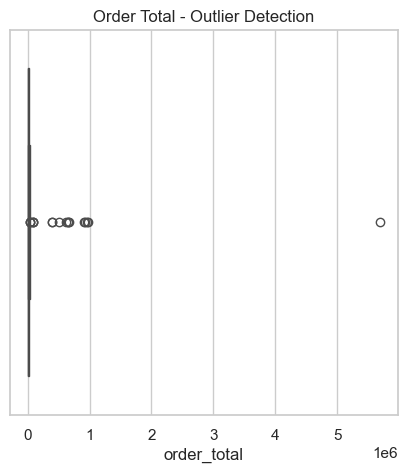

In [64]:

plt.figure(figsize=(5, 5))
sns.boxplot(x=dirty_df['order_total'])
plt.title("Order Total - Outlier Detection")
plt.show()


### Heavily Skewed, therefore compressed box plot, I apply log transformation

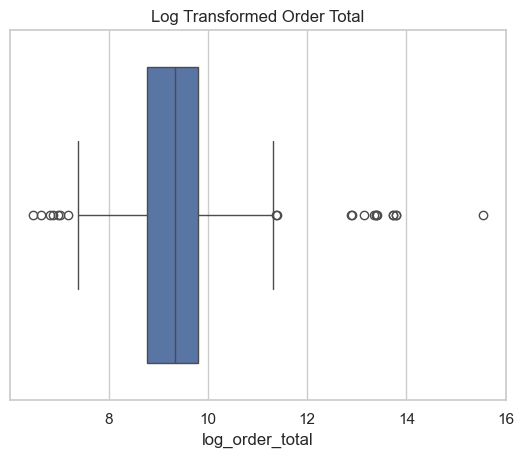

In [65]:

dirty_df['log_order_total'] = np.log1p(dirty_df['order_total'])

# Boxplot after transformation
sns.boxplot(x=dirty_df['log_order_total'])
plt.title("Log Transformed Order Total")
plt.show()


In [66]:

Q1 = dirty_df['order_total'].quantile(0.25)
Q3 = dirty_df['order_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing rows with extreme outliers
dirty_df = dirty_df[(dirty_df['order_total'] >= lower_bound) & (dirty_df['order_total'] <= upper_bound)]

print("After outlier removal, dataset size:", dirty_df.shape)


After outlier removal, dataset size: (482, 17)


In [67]:

missing_df = pd.read_csv('missing_data.csv')


print("Basic Info of Missing Data:")
missing_df.info()

missing_df.head()


Basic Info of Missing Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              490 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    490 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   490 non-null    float64
 8   customer_long                  490 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    490 non-null    float64
 11  season                         490 non-null    object 
 12  is_expedited_delivery 

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD382112,ID0289597187,2019-03-06,Thompson,"[('pearTV', 1), ('Candle Inferno', 2)]",7170.0,61.72,-37.811782,144.951972,15,6156.22,Autumn,True,0.4425,"to many adds in ui it has adds, sends info to ...",False
1,ORD378488,ID1668523020,2019-05-05,Thompson,"[('Thunder line', 1), ('Lucent 330S', 2), ('Al...",13590.0,65.20,-37.808236,144.942181,10,12296.20,Autumn,False,0.6547,s10e haven't had this phone but a short time b...,True
2,ORD279446,ID0370751503,2019-03-24,Bakers,"[('Candle Inferno', 2), ('Universe Note', 1)]",4310.0,78.75,-37.812941,144.985883,15,3742.25,NaN,True,0.8852,best bang for your buck! great overall android...,True
3,ORD277196,ID0634774947,2019-01-12,Thompson,"[('pearTV', 1), ('Thunder line', 1), ('Olivia ...",10940.0,92.59,-37.811748,144.938192,25,8297.59,Summer,True,0.7875,good it was a gift for my niece. it to her in ...,True
4,ORD116193,ID3313210924,2019-09-02,Nickolson,"[('pearTV', 2), ('Universe Note', 2), ('Thunde...",21700.0,95.62,-37.818393,144.967034,5,20710.62,Spring,True,0.2225,"excellent product excellent product, was recei...",True


In [68]:
# Count missing values in each column
missing_counts = missing_df.isnull().sum()
print("Missing values in each column:\n", missing_counts)


Missing values in each column:
 order_id                          0
customer_id                       0
date                              0
nearest_warehouse                10
shopping_cart                     0
order_price                      10
delivery_charges                  0
customer_lat                     10
customer_long                    10
coupon_discount                   0
order_total                      10
season                           10
is_expedited_delivery             0
distance_to_nearest_warehouse    10
latest_customer_review            0
is_happy_customer                10
dtype: int64


In [69]:

num_cols = ['order_price', 'customer_lat', 'customer_long', 'order_total', 'distance_to_nearest_warehouse']
for col in num_cols:
    missing_df[col].fillna(missing_df[col].median(), inplace=True)

print("Missing values after numerical column filling:\n", missing_df.isnull().sum())


Missing values after numerical column filling:
 order_id                          0
customer_id                       0
date                              0
nearest_warehouse                10
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                           10
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                10
dtype: int64


/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/2974857672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_df[col].fillna(missing_df[col].median(), inplace=True)


In [70]:

cat_cols = ['nearest_warehouse', 'season', 'is_happy_customer']
for col in cat_cols:
    missing_df[col].fillna(missing_df[col].mode()[0], inplace=True)

print("Missing values after categorical column filling:\n", missing_df.isnull().sum())


Missing values after categorical column filling:
 order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/1826276866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  missing_df[col].fillna(missing_df[col].mode()[0], inplace=True)
/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/1826276866.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [71]:

missing_reviews = dirty_df[dirty_df['latest_customer_review'].isnull()]
print("Rows with missing customer review:\n", missing_reviews)


Rows with missing customer review:
      order_id   customer_id        date nearest_warehouse  \
21  ORD157688  ID1404219802  2019-12-15            Bakers   

                                  shopping_cart  order_price  \
21  [('Candle Inferno', 1), ('Toshika 750', 1)]         4750   

    delivery_charges  customer_lat  customer_long  coupon_discount  \
21             73.05    -37.802818     144.992404                0   

    order_total  season  is_expedited_delivery  distance_to_nearest_warehouse  \
21      4823.05  Winter                  False                         0.8369   

   latest_customer_review  is_happy_customer  log_order_total  
21                    NaN               True         8.481369  


In [72]:

dirty_df = dirty_df.dropna(subset=['latest_customer_review'])

print("Missing values count after removal:\n", dirty_df.isnull().sum())


Missing values count after removal:
 order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
log_order_total                  0
dtype: int64


###     
##       Datset Cleaned Now, EDA to be performed
###

In [73]:
# Get summary statistics for all numerical columns
dirty_df.describe()


,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,log_order_total
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,25853.384615,76.650686,-35.757277,144.969509,10.987526,12221.767734,2.246802,9.192119
std,87981.051457,14.577483,12.274952,0.022714,8.594563,7265.012209,8.981990,0.727236
min,585.000000,46.350000,-37.827123,144.924967,0.000000,639.290000,0.107800,6.461921
25%,7050.000000,66.010000,-37.818275,144.953491,5.000000,6263.260000,0.745500,8.742616
50%,12770.000000,76.290000,-37.812231,144.965673,10.000000,10946.540000,1.029900,9.300870
75%,20360.000000,82.780000,-37.805513,144.983968,15.000000,17638.330000,1.408700,9.777886
max,947691.000000,114.040000,37.826339,145.019837,25.000000,33947.060000,94.973400,10.432587


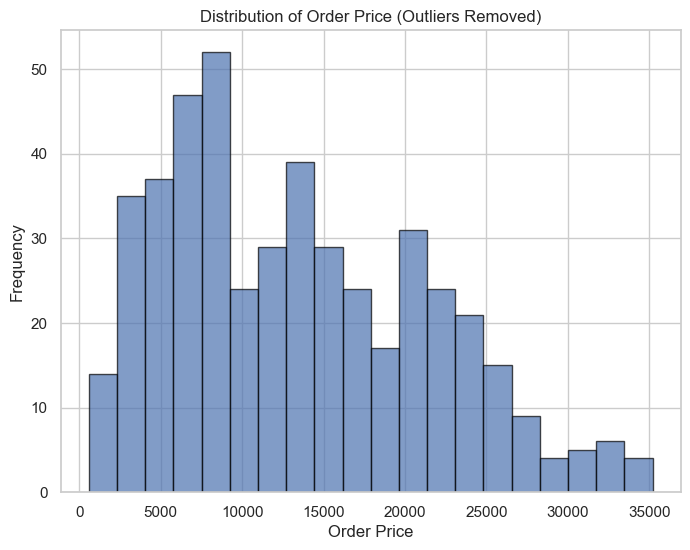

In [74]:

# Compute IQR for order_price
Q1 = dirty_df['order_price'].quantile(0.25)
Q3 = dirty_df['order_price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
filtered_df3 = dirty_df[(dirty_df['order_price'] >= lower_bound) & (dirty_df['order_price'] <= upper_bound)]

# Plot histogram after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(filtered_df3['order_price'], bins= 20, edgecolor='black', alpha=0.7)

plt.title("Distribution of Order Price (Outliers Removed)")
plt.xlabel("Order Price")
plt.ylabel("Frequency")
plt.show()



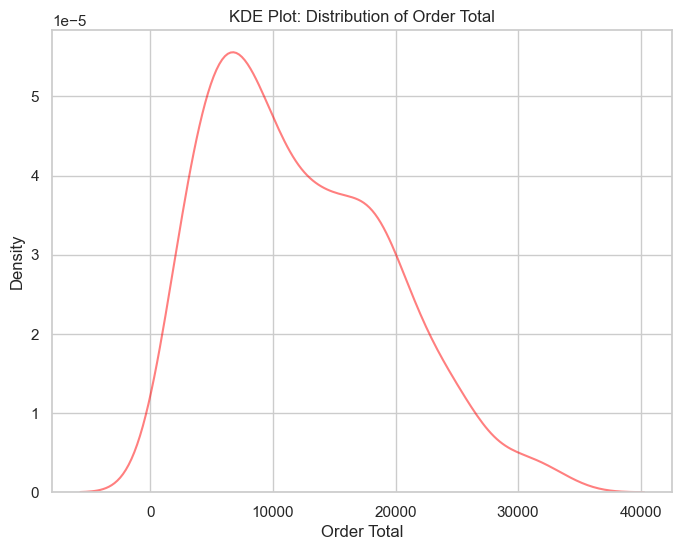

In [102]:

# Plot KDE for order total
plt.figure(figsize=(8, 6))
sns.kdeplot(dirty_df['order_total'], fill=False, color="red", alpha=0.5)
plt.title("KDE Plot: Distribution of Order Total")
plt.xlabel("Order Total")
plt.ylabel("Density")
plt.show()


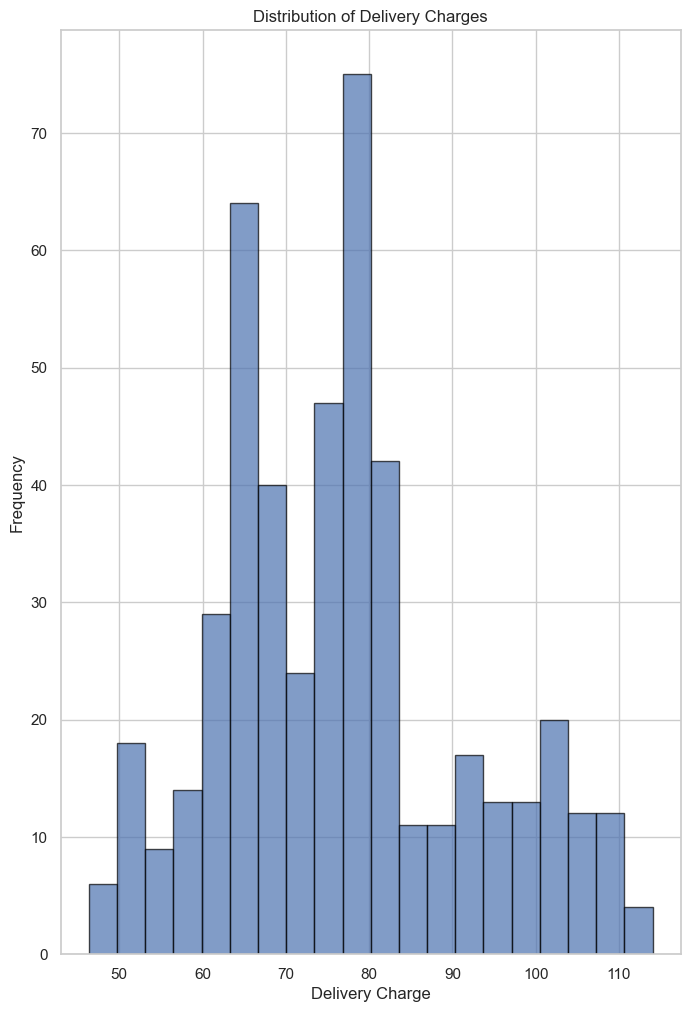

In [75]:
plt.figure(figsize=(8, 12))
plt.hist(dirty_df['delivery_charges'], bins= 20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Delivery Charges")
plt.xlabel("Delivery Charge")
plt.ylabel("Frequency")
plt.show()

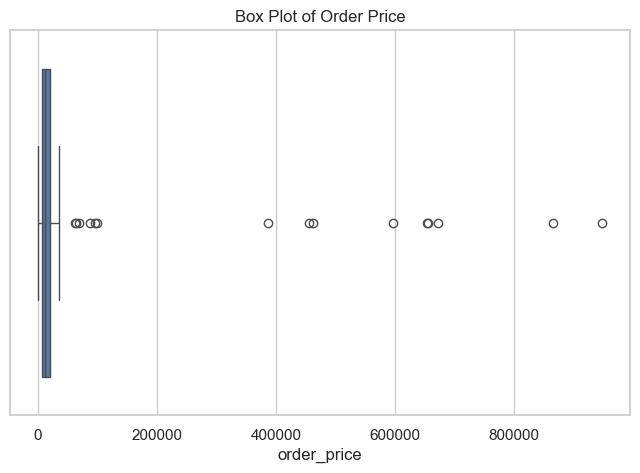

In [76]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=dirty_df['order_price'])
plt.title("Box Plot of Order Price")
plt.show()


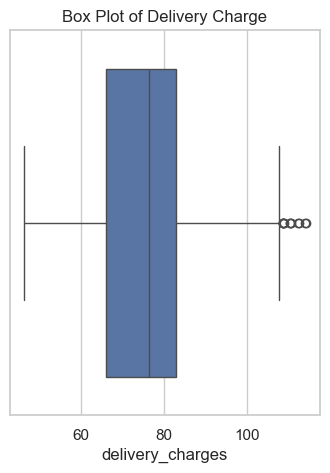

In [77]:
plt.figure(figsize=(4, 5))
sns.boxplot(x=dirty_df['delivery_charges'])
plt.title("Box Plot of Delivery Charge")
plt.show()

In [78]:
dirty_df['season'].value_counts()


season
Spring    130
Autumn    124
Summer    117
Winter    110
Name: count, dtype: int64

In [79]:
dirty_df['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     188
Nickolson    181
Bakers       112
Name: count, dtype: int64

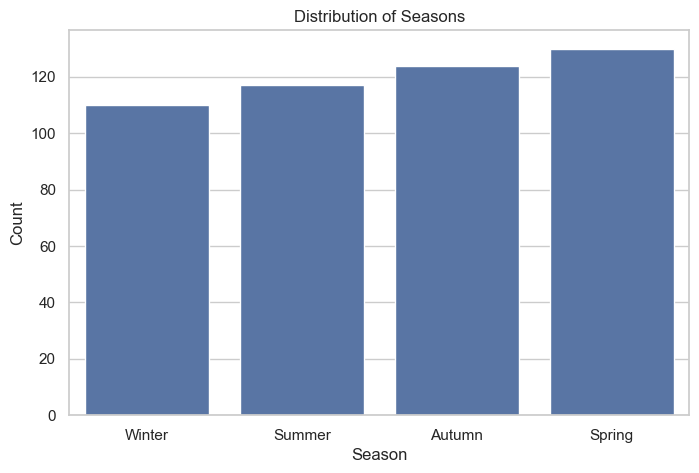

In [80]:
# Bar plot for season
plt.figure(figsize=(8, 5))
sns.countplot(x=dirty_df['season'])
plt.title("Distribution of Seasons")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


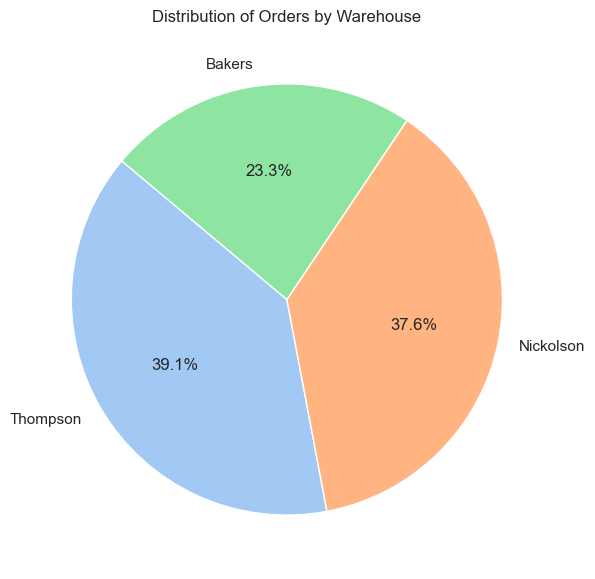

In [81]:

sns.set_theme(style="whitegrid")

# Count the occurrences of each warehouse
warehouse_counts = dirty_df['nearest_warehouse'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"), startangle=140)

plt.title("Distribution of Orders by Warehouse")
plt.show()


In [82]:
from scipy.stats import skew

order_price_skew = skew(dirty_df['order_price'])
order_total_skew = skew(dirty_df['delivery_charges'])

print(f"Skewness of Order Price: {order_price_skew}")
print(f"Skewness of Delivery Charge: {order_total_skew}")


Skewness of Order Price: 7.774295618299304
Skewness of Delivery Charge: 0.48477387613733763


In [83]:

numeric_df = dirty_df.select_dtypes(include=['number']).drop(columns=['customer_lat', 'customer_long', 'log_order_total'], errors='ignore')

correlation_matrix = numeric_df.corr()

correlation_matrix


,order_price,delivery_charges,coupon_discount,order_total,distance_to_nearest_warehouse
order_price,1.000000,0.032419,0.034394,0.157421,-0.019238
delivery_charges,0.032419,1.000000,-0.007551,-0.014007,-0.053733
coupon_discount,0.034394,-0.007551,1.000000,-0.173959,-0.046239
order_total,0.157421,-0.014007,-0.173959,1.000000,0.041328
distance_to_nearest_warehouse,-0.019238,-0.053733,-0.046239,0.041328,1.000000


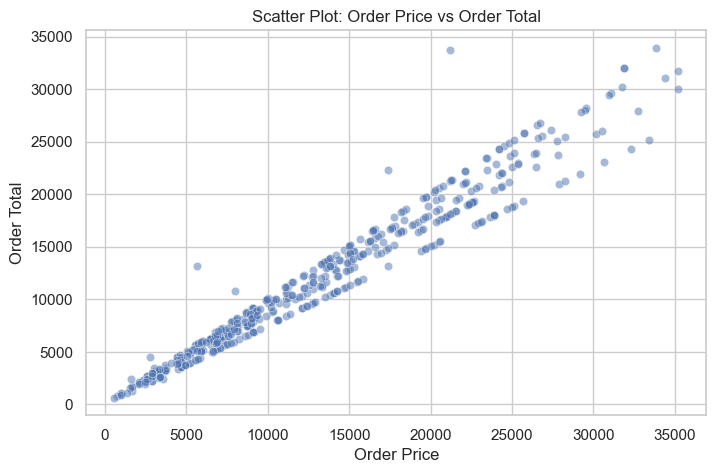

In [84]:

# Compute IQR for order_price and order_total
Q1_price = dirty_df['order_price'].quantile(0.25)
Q3_price = dirty_df['order_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_total = dirty_df['order_total'].quantile(0.25)
Q3_total = dirty_df['order_total'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Define outlier bounds
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

# Remove outliers
filtered_df2 = dirty_df[
    (dirty_df['order_price'] >= lower_bound_price) & (dirty_df['order_price'] <= upper_bound_price) &
    (dirty_df['order_total'] >= lower_bound_total) & (dirty_df['order_total'] <= upper_bound_total)
]

# Plot scatter after removing outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_df2['order_price'], y=filtered_df2['order_total'], alpha=0.5)

plt.title("Scatter Plot: Order Price vs Order Total")
plt.xlabel("Order Price")
plt.ylabel("Order Total")
plt.show()



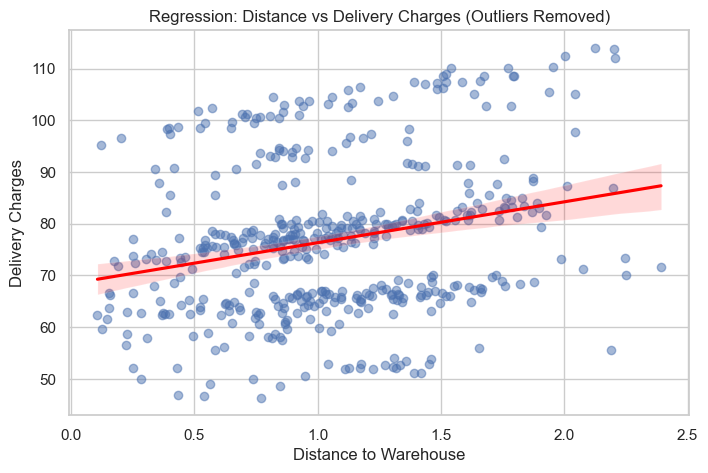

In [85]:
# Remove outliers using IQR method
Q1 = dirty_df['distance_to_nearest_warehouse'].quantile(0.25)
Q3 = dirty_df['distance_to_nearest_warehouse'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only values within this range
filtered_df = dirty_df[(dirty_df['distance_to_nearest_warehouse'] >= lower_bound) & (dirty_df['distance_to_nearest_warehouse'] <= upper_bound)]

# Replot without outliers
plt.figure(figsize=(8, 5))
sns.regplot(x=filtered_df['distance_to_nearest_warehouse'], y=filtered_df['delivery_charges'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title("Regression: Distance vs Delivery Charges (Outliers Removed)")
plt.xlabel("Distance to Warehouse")
plt.ylabel("Delivery Charges")
plt.show()



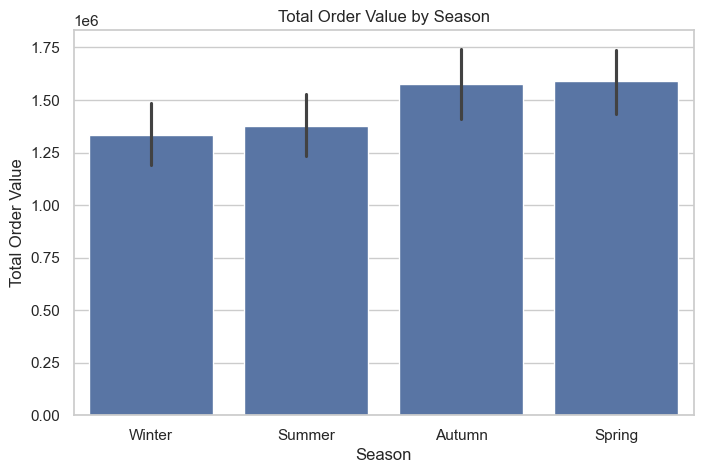

In [86]:

# Bar plot: Average order total by season
plt.figure(figsize=(8, 5))
sns.barplot(x=dirty_df['season'], y=dirty_df['order_total'], estimator=sum)

plt.title("Total Order Value by Season")
plt.xlabel("Season")
plt.ylabel("Total Order Value")
plt.show()


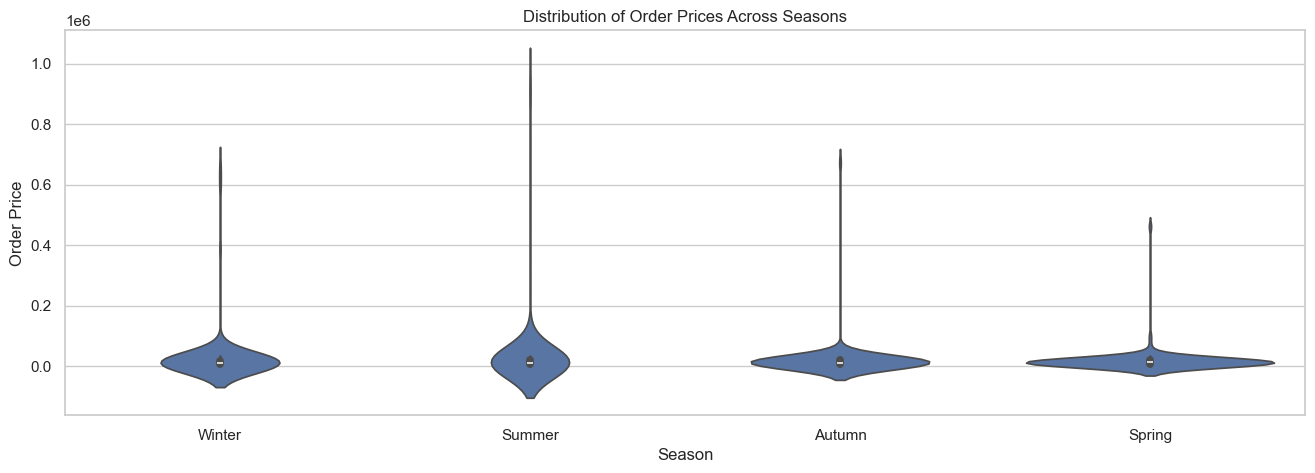

In [87]:
# Violin plot: Order price distribution by season
plt.figure(figsize=(16, 5))
sns.violinplot(x=dirty_df['season'], y=dirty_df['order_price'])

plt.title("Distribution of Order Prices Across Seasons")
plt.xlabel("Season")
plt.ylabel("Order Price")
plt.show()


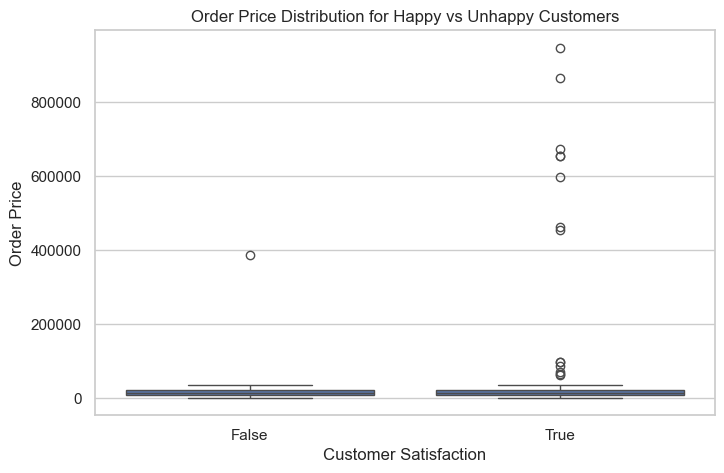

In [88]:
# Box plot: Order price distribution for happy vs unhappy customers
plt.figure(figsize=(8, 5))
sns.boxplot(x=dirty_df['is_happy_customer'], y=dirty_df['order_price'])

plt.title("Order Price Distribution for Happy vs Unhappy Customers")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Order Price")
plt.show()


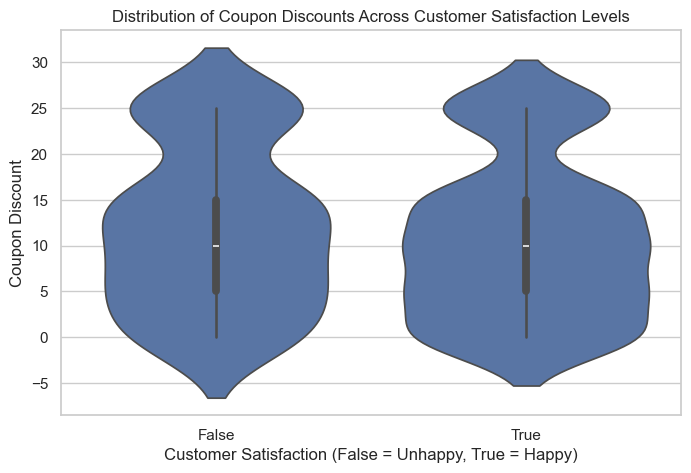

In [89]:
# Violin plot: Distribution of coupon discounts for happy vs unhappy customers
plt.figure(figsize=(8, 5))
sns.violinplot(x=dirty_df['is_happy_customer'], y=dirty_df['coupon_discount'])

plt.title("Distribution of Coupon Discounts Across Customer Satisfaction Levels")
plt.xlabel("Customer Satisfaction (False = Unhappy, True = Happy)")
plt.ylabel("Coupon Discount")
plt.show()


/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/2167231041.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'],
/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/2167231041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'],
/var/folders/kv/xnj6pn757lxdlvnf8_vntwyc0000gn/T/ipykernel_6005/2167231041.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'],


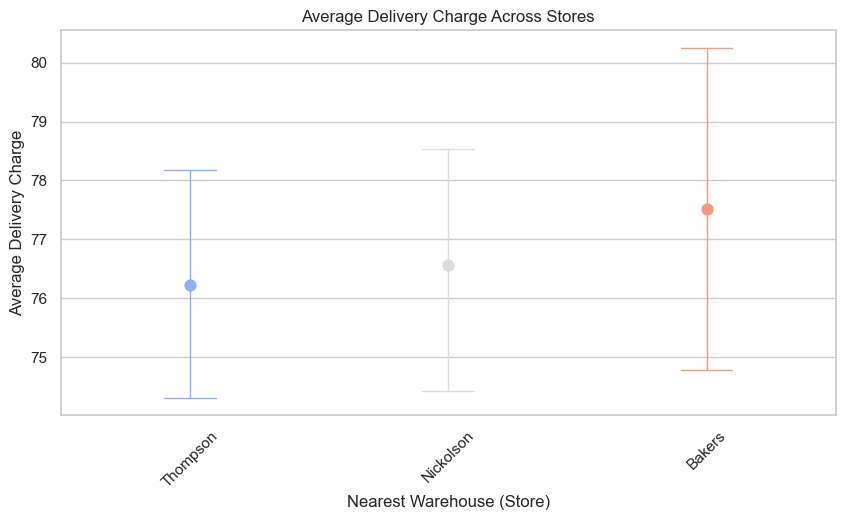

In [90]:

plt.figure(figsize=(10, 5))
sns.pointplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'], 
              ci=95, capsize=0.2, errwidth=1, palette="coolwarm")

plt.title("Average Delivery Charge Across Stores")
plt.xlabel("Nearest Warehouse (Store)")
plt.ylabel("Average Delivery Charge")
plt.xticks(rotation=45)
plt.show()



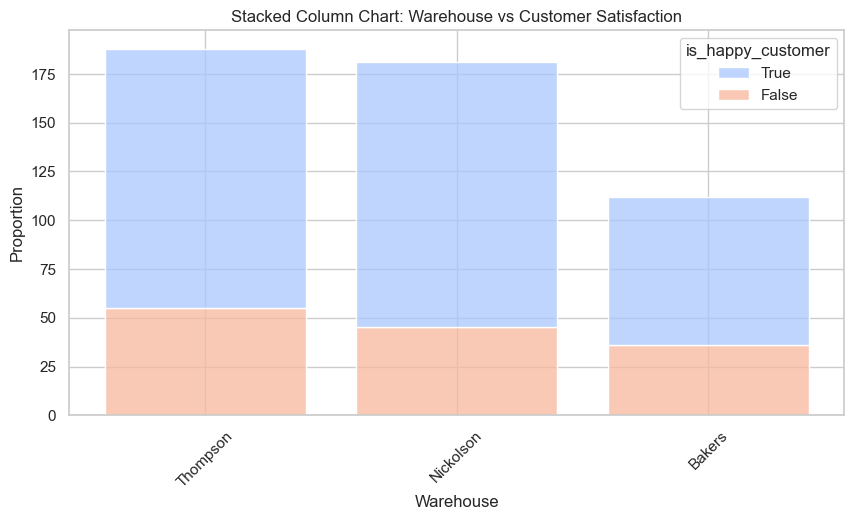

In [91]:
dirty_df['is_happy_customer'] = dirty_df['is_happy_customer'].astype(str)

# Create a stacked bar chart
plt.figure(figsize=(10, 5))
sns.histplot(data=dirty_df, x='nearest_warehouse', hue='is_happy_customer', multiple='stack', 
             shrink=0.8, palette="coolwarm")

plt.title("Stacked Column Chart: Warehouse vs Customer Satisfaction")
plt.xlabel("Warehouse")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

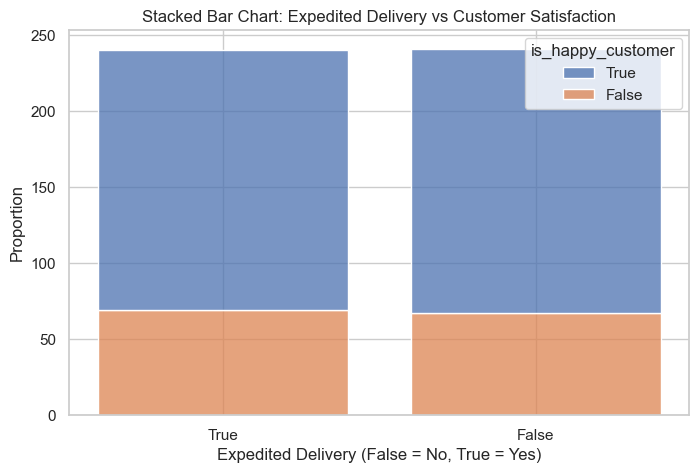

In [92]:

dirty_df['is_expedited_delivery'] = dirty_df['is_expedited_delivery'].astype(str)

# Create a stacked bar chart
plt.figure(figsize=(8, 5))
sns.histplot(data=dirty_df, x='is_expedited_delivery', hue='is_happy_customer', multiple='stack', 
             shrink=0.8)

plt.title("Stacked Bar Chart: Expedited Delivery vs Customer Satisfaction")
plt.xlabel("Expedited Delivery (False = No, True = Yes)")
plt.ylabel("Proportion")

plt.show()



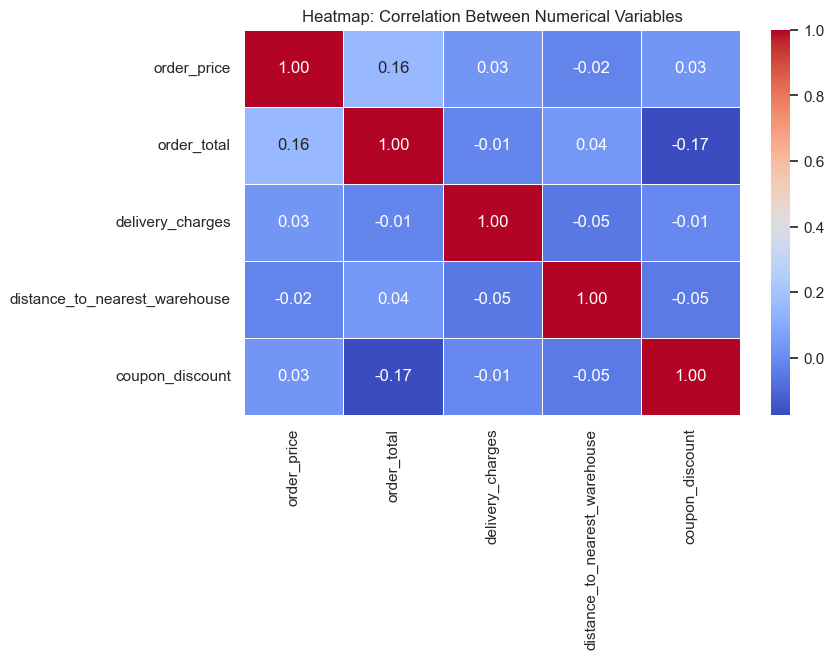

In [93]:

corr_features = ['order_price', 'order_total', 'delivery_charges', 'distance_to_nearest_warehouse', 'coupon_discount']
corr_matrix = dirty_df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Add title
plt.title("Heatmap: Correlation Between Numerical Variables")
plt.show()


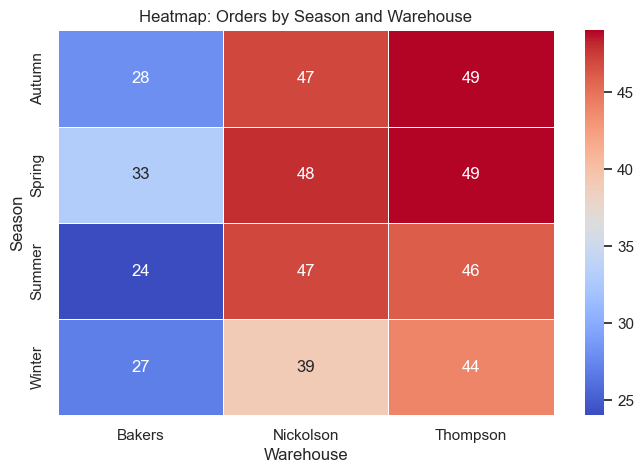

In [94]:
# Create a crosstab
crosstab = pd.crosstab(dirty_df['season'], dirty_df['nearest_warehouse'])

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

plt.title("Heatmap: Orders by Season and Warehouse")
plt.xlabel("Warehouse")
plt.ylabel("Season")
plt.show()

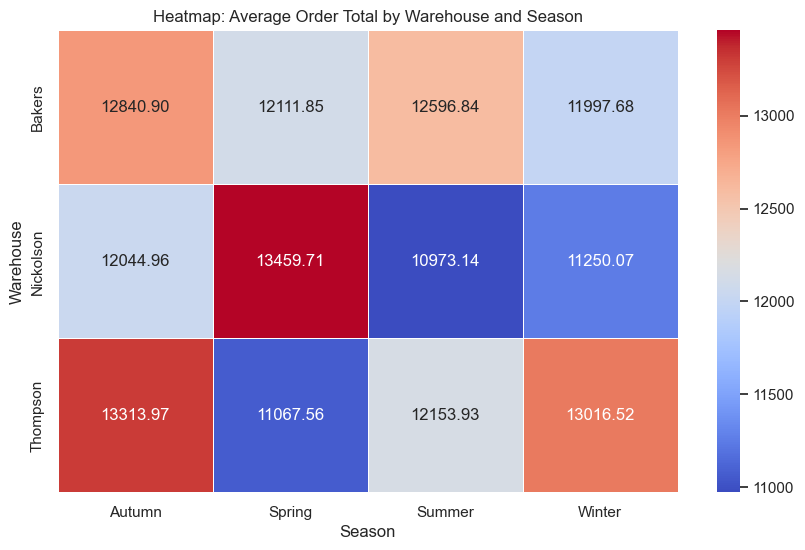

In [96]:

# Create a pivot table (Warehouse vs Season, showing Avg Order Total)
pivot_table = dirty_df.pivot_table(values='order_total', index='nearest_warehouse', columns='season', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Add title
plt.title("Heatmap: Average Order Total by Warehouse and Season")
plt.xlabel("Season")
plt.ylabel("Warehouse")
plt.show()




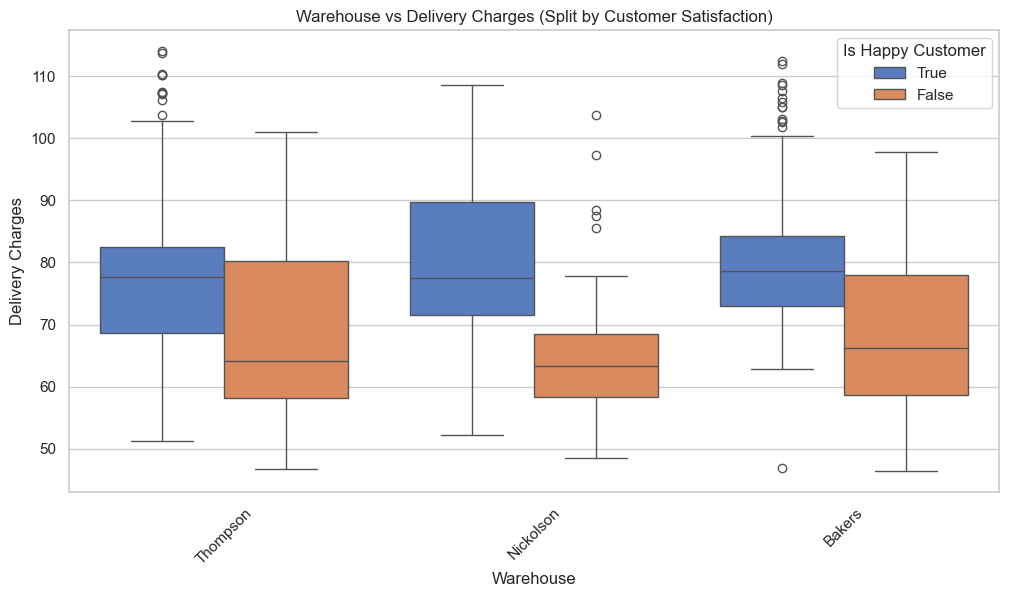

In [97]:
# Box plot for warehouse vs delivery charge, split by customer satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'], hue=dirty_df['is_happy_customer'], palette="muted")

plt.title("Warehouse vs Delivery Charges (Split by Customer Satisfaction)")
plt.xlabel("Warehouse")
plt.ylabel("Delivery Charges")
plt.xticks(rotation=45)
plt.legend(title="Is Happy Customer")
plt.show()


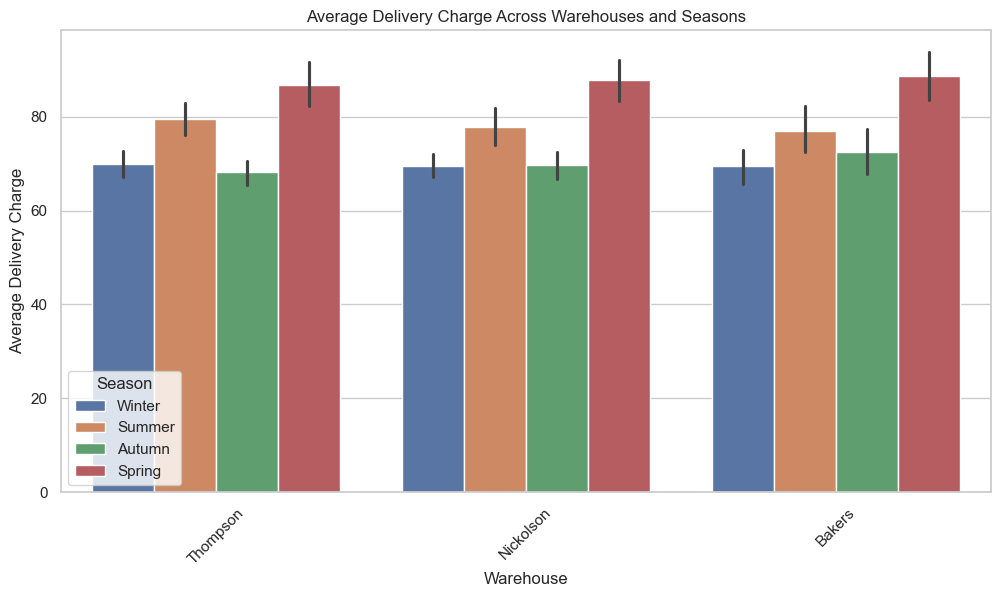

In [98]:

# Bar plot for warehouse & season vs avg delivery charge
plt.figure(figsize=(12, 6))
sns.barplot(x=dirty_df['nearest_warehouse'], y=dirty_df['delivery_charges'], hue=dirty_df['season'])

plt.title("Average Delivery Charge Across Warehouses and Seasons")
plt.xlabel("Warehouse")
plt.ylabel("Average Delivery Charge")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()


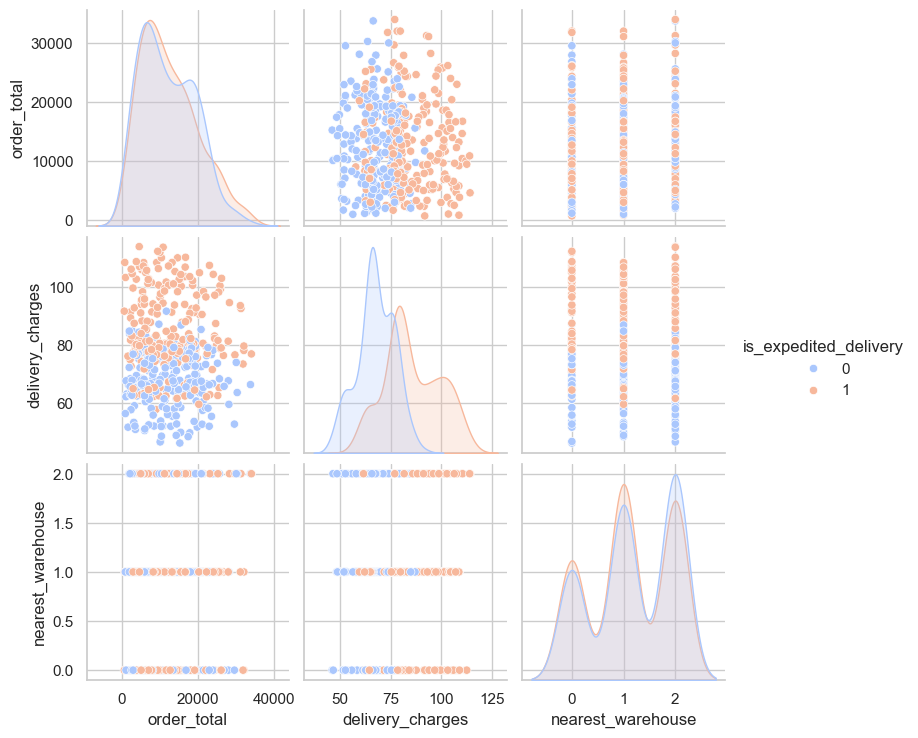

In [99]:

# Ensure 'is_expedited_delivery' is properly converted from string to boolean
dirty_df['is_expedited_delivery'] = dirty_df['is_expedited_delivery'].map({'True': True, 'False': False}).astype(bool)

# Select relevant numerical & categorical features
plot_data = dirty_df[['order_total', 'delivery_charges', 'is_expedited_delivery', 'nearest_warehouse']].copy()

# Convert categorical to numerical for plotting
plot_data['is_expedited_delivery'] = plot_data['is_expedited_delivery'].astype(int)
plot_data['nearest_warehouse'] = plot_data['nearest_warehouse'].astype('category').cat.codes

# Create pair plot
sns.pairplot(plot_data, hue="is_expedited_delivery", palette="coolwarm")
plt.show()


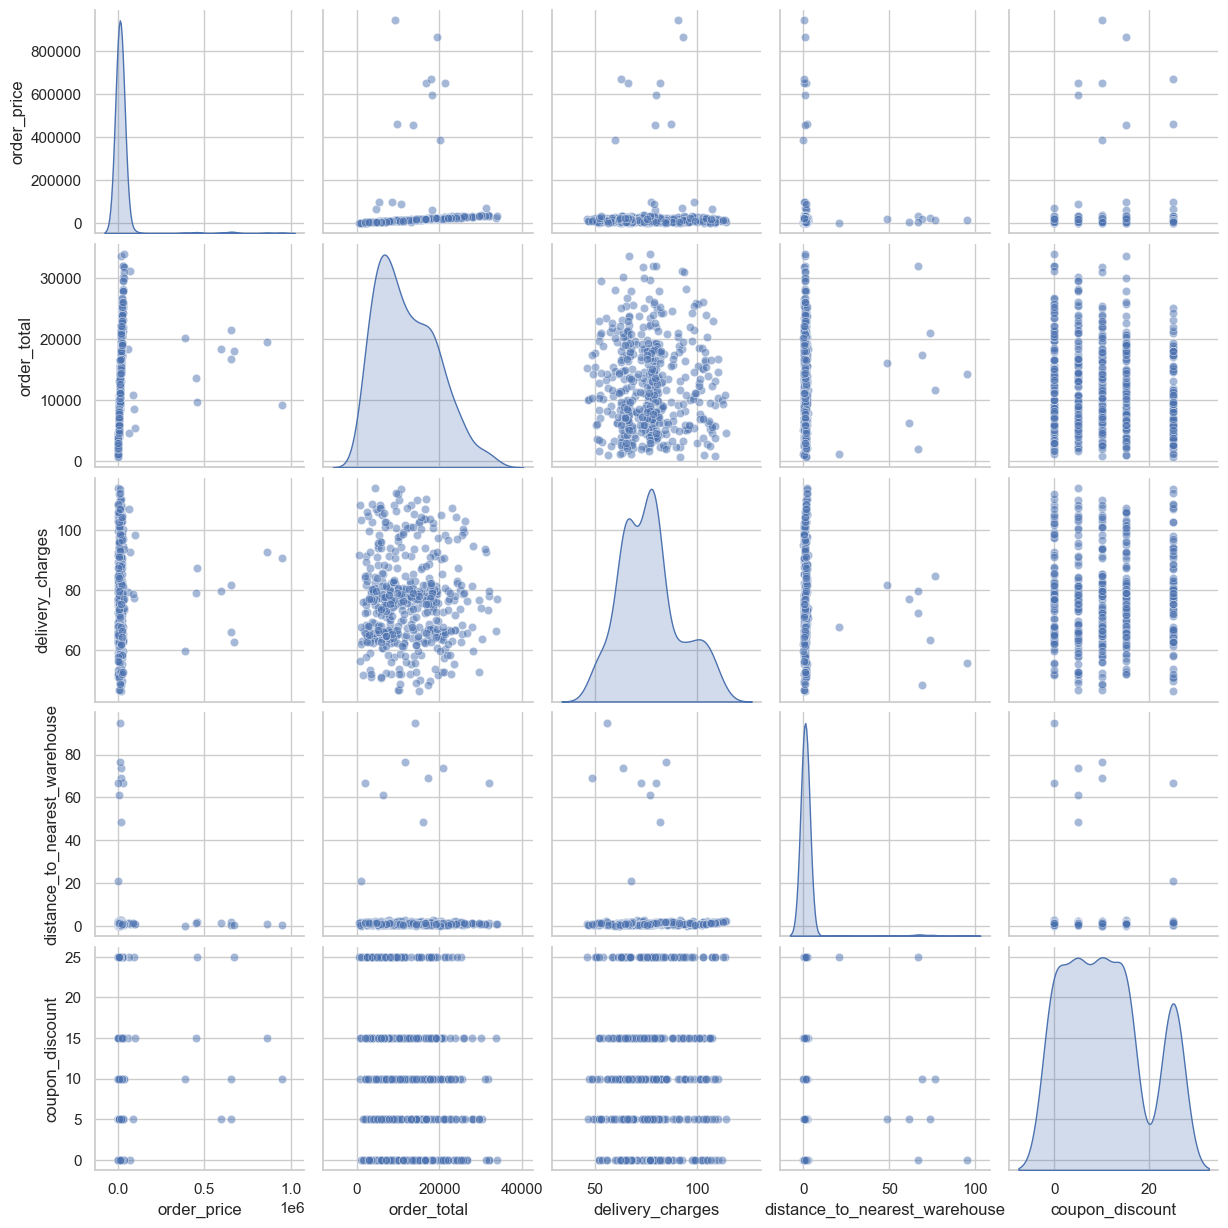

In [103]:
num_features = ['order_price', 'order_total', 'delivery_charges', 'distance_to_nearest_warehouse', 'coupon_discount']

# Create a pair plot
sns.pairplot(dirty_df[num_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()